## Exercise 3

In [17]:
import pandas_datareader.data as web
import datetime
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# set start and end dates
start = datetime.datetime(1960, 1, 1)
end = datetime.datetime(2015, 1, 1)

#download data from FRED
# real GDP data
GDP = web.DataReader("GDPC1", "fred", start, end) 
GDP = GDP.resample('3M').mean()
logGDP = np.log(GDP.values)

# real consumption data
C = web.DataReader("PCECC96", "fred", start, end) 
C = C.resample('3M').mean()
logC = np.log(C.values)

# real investment data
I = web.DataReader("GPDIC1", "fred", start, end) 
I = I.resample('3M').mean()
logI = np.log(I.values)

# GDP deflator
D = web.DataReader("GDPDEF", "fred", start, end) 
D = D.resample('3M').mean()
logD = np.log(D.values)

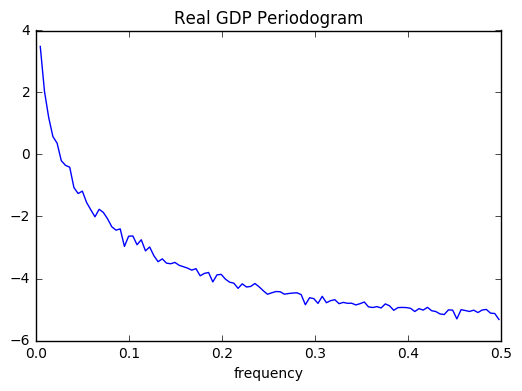

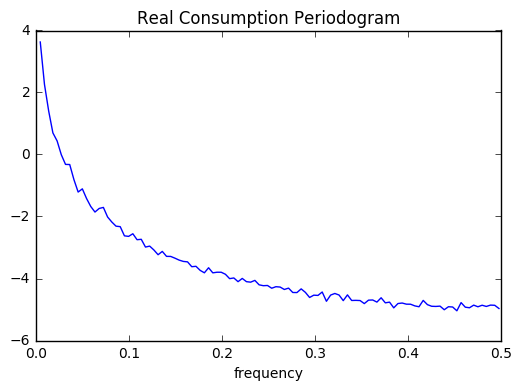

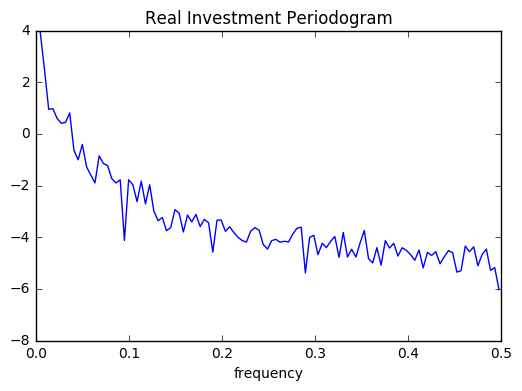

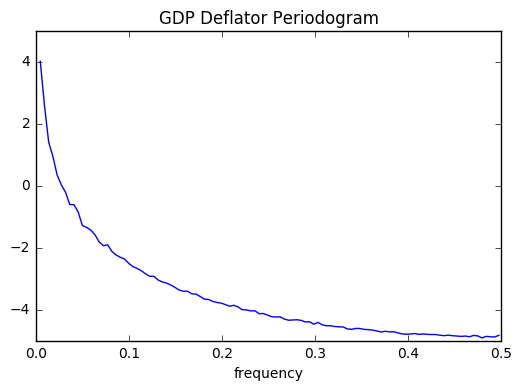

In [19]:
GDPfreq, GDPper = sig.periodogram(logGDP, axis=0)
plt.plot(GDPfreq[1:], np.log(GDPper[1:]))
plt.title('Real GDP Periodogram')
plt.xlabel('frequency')
plt.show()

Cfreq, Cper = sig.periodogram(logC, axis=0)
plt.plot(Cfreq[1:], np.log(Cper[1:]))
plt.title('Real Consumption Periodogram')
plt.xlabel('frequency')
plt.show()

Ifreq, Iper = sig.periodogram(logI, axis=0)
plt.plot(Ifreq[1:], np.log(Iper[1:]))
plt.title('Real Investment Periodogram')
plt.xlabel('frequency')
plt.show()

Dfreq, Dper = sig.periodogram(logD, axis=0)
plt.plot(Dfreq[1:], np.log(Dper[1:]))
plt.title('GDP Deflator Periodogram')
plt.xlabel('frequency')
plt.show()


## Exercise 4

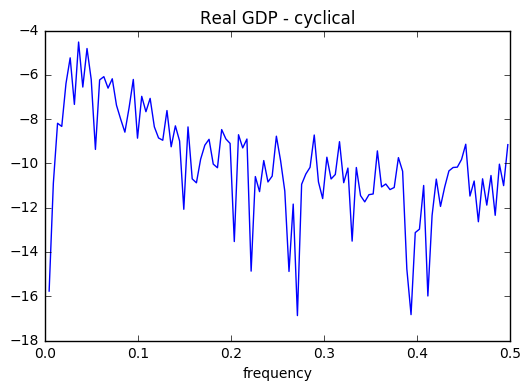

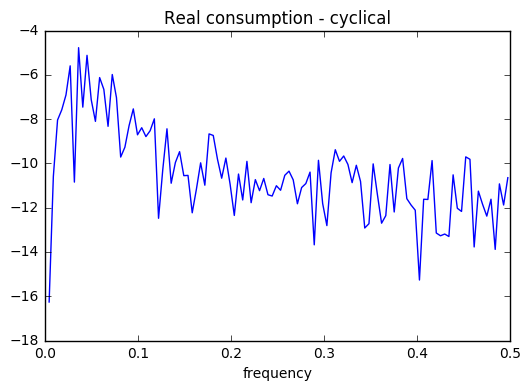

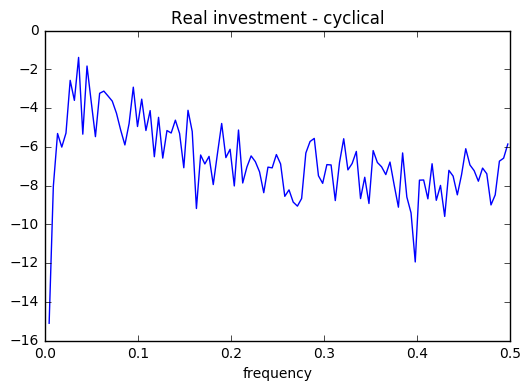

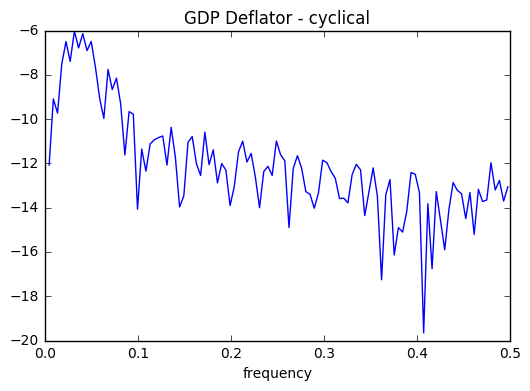

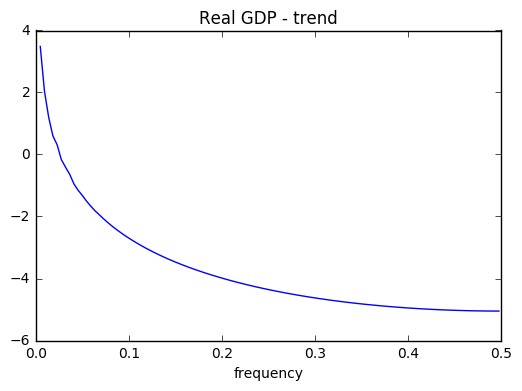

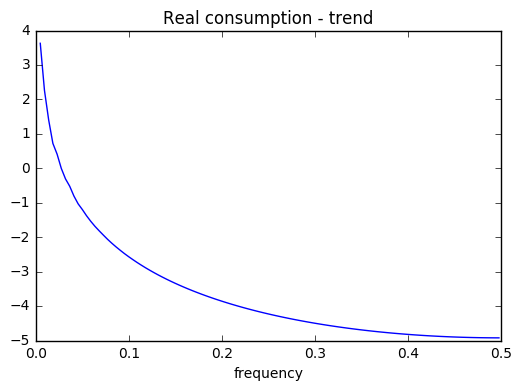

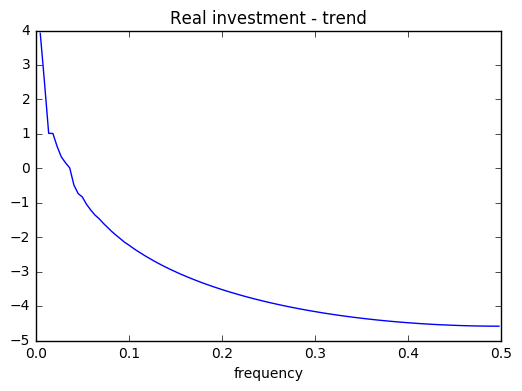

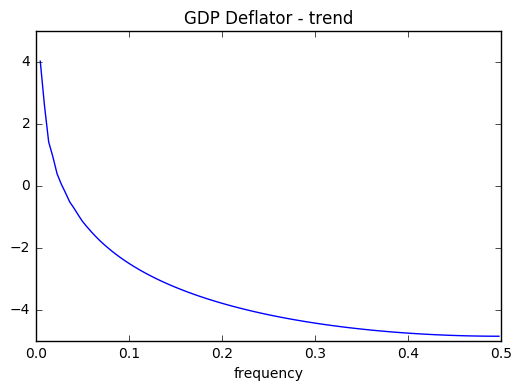

In [22]:
# Filter the data with HP

GDPcy, GDPtr = sm.tsa.filters.hpfilter(logGDP, 1600)
Ccy, Ctr = sm.tsa.filters.hpfilter(logC, 1600)
Icy, Itr = sm.tsa.filters.hpfilter(logI, 1600)
Dcy, Dtr = sm.tsa.filters.hpfilter(logD, 1600)

# Plot the cyclical components

GDPfreq, GDPcyper = sig.periodogram(GDPcy, axis=0)
plt.plot(GDPfreq[1:], np.log(GDPcyper[1:]))
plt.title('Real GDP - cyclical')
plt.xlabel('frequency')
plt.show()

Cfreq, Ccyper = sig.periodogram(Ccy, axis=0)
plt.plot(Cfreq[1:], np.log(Ccyper[1:]))
plt.title('Real consumption - cyclical')
plt.xlabel('frequency')
plt.show()

Ifreq, Icyper = sig.periodogram(Icy, axis=0)
plt.plot(Ifreq[1:], np.log(Icyper[1:]))
plt.title('Real investment - cyclical')
plt.xlabel('frequency')
plt.show()

Dfreq, Dcyper = sig.periodogram(Dcy, axis=0)
plt.plot(Dfreq[1:], np.log(Dcyper[1:]))
plt.title('GDP Deflator - cyclical')
plt.xlabel('frequency')
plt.show()

# Plot the trend components

GDPfreq, GDPtrper = sig.periodogram(GDPtr, axis=0)
plt.plot(GDPfreq[1:], np.log(GDPtrper[1:]))
plt.title('Real GDP - trend')
plt.xlabel('frequency')
plt.show()

Cfreq, Ctrper = sig.periodogram(Ctr, axis=0)
plt.plot(Cfreq[1:], np.log(Ctrper[1:]))
plt.title('Real consumption - trend')
plt.xlabel('frequency')
plt.show()

Ifreq, Itrper = sig.periodogram(Itr, axis=0)
plt.plot(Ifreq[1:], np.log(Itrper[1:]))
plt.title('Real investment - trend')
plt.xlabel('frequency')
plt.show()

Dfreq, Dtrper = sig.periodogram(Dtr, axis=0)
plt.plot(Dfreq[1:], np.log(Dtrper[1:]))
plt.title('GDP Deflator - trend')
plt.xlabel('frequency')
plt.show()